# **Actividad 01: Potencial Transmembranal de GHK**
**Autor:** Josselyn Izamar García Chávez   
**Matrícula:** 1963721

## 1. Instalacion de la libreria SymPy

In [197]:
try:
  import sympy
  print('SymPy fue importado con exito')
except:
  !pip install sympy

SymPy fue importado con exito


## 2. Importar modulos requeridos para definicion de variables simbolicas

In [198]:
from sympy import symbols
from sympy import log

## 3.1 Simulacion del potencial de Nernst del Potasio del musculo de una rana

In [199]:
# Definir símbolos
R, T, F = symbols('R T F')
K_o, K_i, K_z = symbols('K_o K_i K_z')

In [200]:
# Mostrar los símbolos de forma simbólica
display(R, T, F, K_o, K_i, K_z)

R

T

F

K_o

K_i

K_z

In [201]:
# Definicion de la funcion del potencial de Nernst del K
V_K = -(R * T / (K_z * F)) * log(K_i / K_o)

In [202]:
V_K

-R*T*log(K_i/K_o)/(F*K_z)

En este caso, Sympy automáticamente  considera a In() como la función log(). Por esta razón no se imprimió con el logaritmo natural, como es lo correcto

In [203]:
# Asignacion de valores numericos a las variables de concentracion de K
V_K_numeric = V_K.subs({K_o:2.5, K_i:140, K_z:1, F:96485, T:310, R:8.314}).evalf()

In [204]:
V_K_numeric

-0.107526557771667

## 3.2 Simulacion del potencial de Nernst del Sodio del musculo de una rana

In [205]:
# Definir símbolos
R, T, F = symbols('R T F')
Na_o, Na_i, Na_z = symbols('Na_o Na_i Na_z')

In [206]:
# Mostrar los símbolos de forma simbólica
display(R, T, F, Na_o, Na_i, Na_z)

R

T

F

Na_o

Na_i

Na_z

In [207]:
# Definicion de la funcion del potencial de Nernst del K
V_Na = -(R * T / (Na_z * F)) * log(Na_i / Na_o)

In [208]:
V_Na

-R*T*log(Na_i/Na_o)/(F*Na_z)

In [209]:
# Asignacion de valores numericos a las variables de concentracion de K
V_Na_numeric = V_Na.subs({Na_o:120, Na_i:9.2, Na_z:1, F:96485, T:310, R:8.314}).evalf()

In [210]:
V_Na_numeric

0.0686049858604714

## 3.3 Simulacion del potencial de Nernst del Cloro del musculo de una rana

In [211]:
# Definir símbolos
R, T, F = symbols('R T F')
Cl_o, Cl_i, Cl_z = symbols('Cl_o Cl_i Cl_z')

In [17]:
# Mostrar los símbolos de forma simbólica
display(R, T, F, Cl_o, Cl_i, Cl_z)

R

T

F

Cl_o

Cl_i

Cl_z

In [18]:
# Definicion de la funcion del potencial de Nernst del K
V_Cl = -(R * T / (Cl_z * F)) * log(Cl_i / Cl_o)

In [19]:
V_Cl

-R*T*log(Cl_i/Cl_o)/(Cl_z*F)

In [20]:
# Asignacion de valores numericos a las variables de concentracion de K
V_Cl_numeric = V_Cl.subs({Cl_o:120, Cl_i:4, Cl_z:-1, F:96485, T:310, R:8.314}).evalf()

In [21]:
V_Cl_numeric

-0.0908539364632134

## 4. Definicion de la ecuacion del potencial de GHK

Utilizando los siguientes valores de permeabilidad para simular el potencial de GHK de un:

Axon de calamar:
* P_Na=0.04
* P_K=1
* P_Cl=0.45

Musculo de rana
* P_Na=2*(10^(-8))
* P_K=2*(10^(-6))
* P_Cl=4*(10^(-6))

Musculo de un mamifero
* P_Na=0.04
* P_K=1
* P_Cl=0.45


4.1 Potencial de GHK de un Axon de calamar

In [22]:
# Definir símbolos
P_Na, P_K, P_Cl = symbols('P_Na P_K P_Cl')

In [23]:
# Mostrar los símbolos de forma simbólica
display(P_Na, P_K, P_Cl)

P_Na

P_K

P_Cl

In [24]:
# Modelo de potencial de GHK
V_axon_calamar =  ((R * T / F)) * (log(((P_Na * Na_o) + (P_K * K_o) + (P_Cl * Cl_i)) / ((P_Na * Na_i) + (P_K * K_i) + (P_Cl * Cl_o))))
V_axon_calamar

R*T*log((Cl_i*P_Cl + K_o*P_K + Na_o*P_Na)/(Cl_o*P_Cl + K_i*P_K + Na_i*P_Na))/F

In [25]:
# Valores de las variables y resolver la funcion
V_axon_calamar_numeric = V_axon_calamar.subs({P_Na: 0.04, P_K: 1, P_Cl: 0.45,
                                              Cl_o:540, Cl_i:100, Na_o:460, Na_i:50, K_o:10, K_i:400, F:96485, T:310, R:8.314}).evalf()
V_axon_calamar_numeric

-0.0580546304115495

4.2 Potencial de GHK de musculo de Rana

In [26]:
# Modelo de potencial de GHK
V_musculo_rana =  ((R * T / F)) * (log(((P_Na * Na_o) + (P_K * K_o) + (P_Cl * Cl_i)) / ((P_Na * Na_i) + (P_K * K_i) + (P_Cl * Cl_o))))
V_musculo_rana

R*T*log((Cl_i*P_Cl + K_o*P_K + Na_o*P_Na)/(Cl_o*P_Cl + K_i*P_K + Na_i*P_Na))/F

In [27]:
# Valores de las variables y resolver la funcion
V_musculo_rana_numeric = V_musculo_rana.subs({P_Na: 2 * (10**(-8)), P_K: 2 * (10**(-6)), P_Cl: 4 * (10**(-6)),
                                              Cl_o:120, Cl_i:4, Cl_z:1, Na_o:120, Na_i:9.2, Na_z:1, K_o:2.5, K_i:140, K_z:1, F:96485, T:310, R:8.314}).evalf()
V_musculo_rana_numeric

-0.0929809626678541

4.3 Potencial de GHK de musculo de mamifero

In [28]:
# Modelo de potencial de GHK
V_musculo_mamifero =  ((R * T / F)) * (log(((P_Na * Na_o) + (P_K * K_o) + (P_Cl * Cl_i)) / ((P_Na * Na_i) + (P_K * K_i) + (P_Cl * Cl_o))))
V_musculo_mamifero

R*T*log((Cl_i*P_Cl + K_o*P_K + Na_o*P_Na)/(Cl_o*P_Cl + K_i*P_K + Na_i*P_Na))/F

In [29]:
# Valores de las variables y resolver la funcion
V_musculo_mamifero_numeric = V_musculo_mamifero.subs({P_Na: 0.04, P_K: 1, P_Cl: 0.45,
                                              Cl_o:123, Cl_i:4.2, Cl_z:1, Na_o:145, Na_i:12, Na_z:1, K_o:4, K_i:155, K_z:1, F:96485, T:310, R:8.314}).evalf()
V_musculo_mamifero_numeric

-0.0772605873037587

## 5. Genere variaciones en las concentraciones ionicas en el tiempo para describir el comportamiento observado

Las variables de concentracion ionica estan dadas como valores estaticos en la Tabla 1. Agregue una variacion sinoidal de 10% del valor minimo de concentracion ionica en ambas terminales de la membrana celular y genere una simulacion por 2 periodos de onda. Introduzca esta variacion al canal de Na del axon de calamar. Grafique su resultado.

Vin = sin(2*pi*t*f/T)

VNa = ENa*Vin

donde: f=60hz, T=1/f y t=vector tiempo

In [212]:
# Definir símbolos
Vin,VNa,ENa,t,f,Ts, Na_ratio_expression, V_Na2 = symbols('V_in V_Na E_Na t f T_s Rat V_Na2')

In [213]:
# Mostrar los símbolos de forma simbólica
display (Vin, VNa, ENa, t, f, Ts)

V_in

V_Na

E_Na

t

f

T_s

In [214]:
# Variación sinusoidal
Vin = sympy.sin(2*sympy.pi*t*f/Ts)
Vin

sin(2*pi*f*t/T_s)

In [215]:
ENa = -(R * T / (Na_z * F)) * log(Na_i / Na_o)
VNa = ENa * Vin
VNa

-R*T*log(Na_i/Na_o)*sin(2*pi*f*t/T_s)/(F*Na_z)

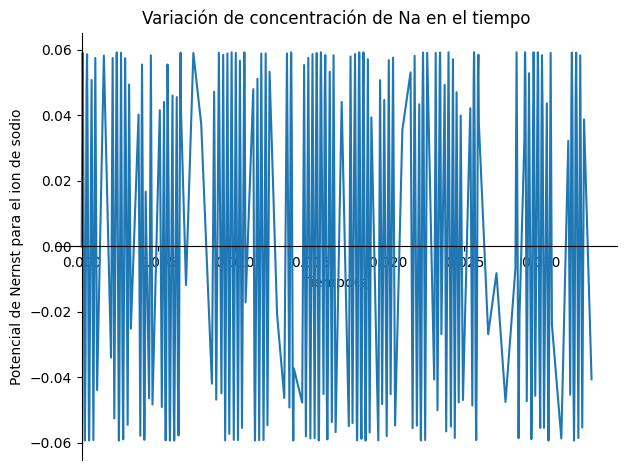

In [216]:
#Gráfica
#Un periodo es T = 1/60. Para obtener 2 periodos de onda ---> 2T = 2/60 = 0.033334
sympy.plot(VNa.subs({Na_o:460, Na_i:50, Na_z:1, f:60, Ts:1/60, F:96485, T:310, R:8.314}),(t,0,0.0333),
           title="Variación de concentración de Na en el tiempo",xlabel="Tiempo(s)",
           ylabel="Potencial de Nernst para el ion de sodio")

In [217]:
#Ratio de las concentraciones
Na_ratio_expression = Na_o/Na_i
VNa2 = Na_ratio_expression * Vin
VNa2

Na_o*sin(2*pi*f*t/T_s)/Na_i

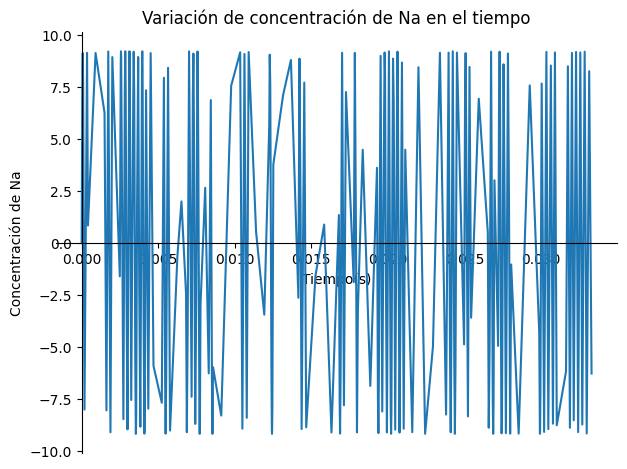

In [218]:
#Gráfica
#Un periodo es T = 1/60. Para obtener 2 periodos de onda ---> 2T = 2/60 = 0.033334
sympy.plot(VNa2.subs({Na_o:460, Na_i:50, F:96485, T:310, R:8.314, f:60, Ts:1/60,}),(t,0,0.0333),
           title="Variación de concentración de Na en el tiempo",xlabel="Tiempo(s)",
           ylabel="Concentración de Na")

Agregando una variacion sinoidal de 10% del valor minimo de concentracion ionica en ambas terminales de la membrana celular obtenemos:

In [221]:
#Ratio de las concentraciones
Na_ratio_expression = (Na_o/Na_i)*1.1
VNa2 = Na_ratio_expression * Vin
VNa2

1.1*Na_o*sin(2*pi*f*t/T_s)/Na_i

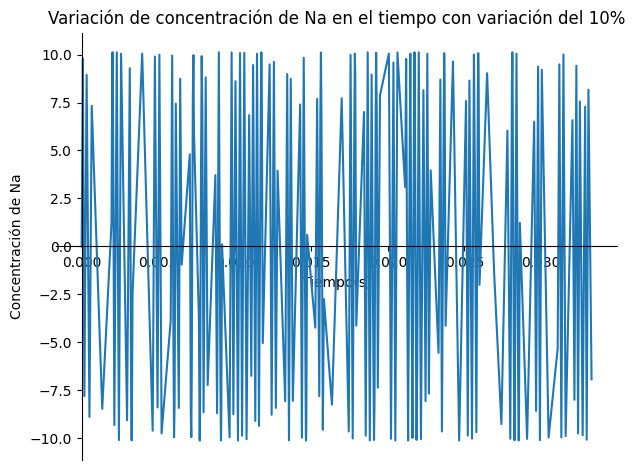

In [222]:
#Gráfica
#Un periodo es T = 1/60. Para obtener 2 periodos de onda ---> 2T = 2/60 = 0.033334
sympy.plot(VNa2.subs({Na_o:460, Na_i:50, F:96485, T:310, R:8.314, f:60, Ts:1/60,}),(t,0,0.0333),
           title="Variación de concentración de Na en el tiempo con variación del 10%",xlabel="Tiempo(s)",
           ylabel="Concentración de Na")